In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_invalid_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"Number of rows with 0 in {col}: {zero_count}")

Number of rows with 0 in Glucose: 5
Number of rows with 0 in BloodPressure: 35
Number of rows with 0 in SkinThickness: 227
Number of rows with 0 in Insulin: 374
Number of rows with 0 in BMI: 11


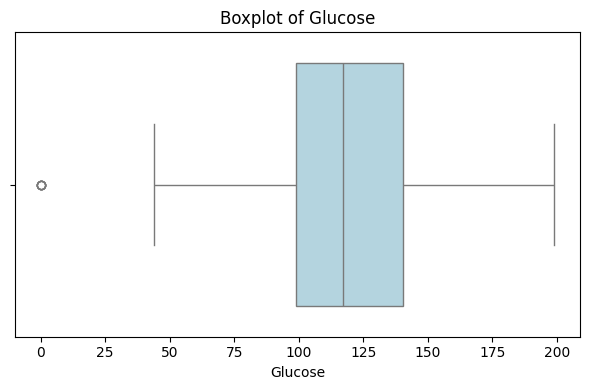

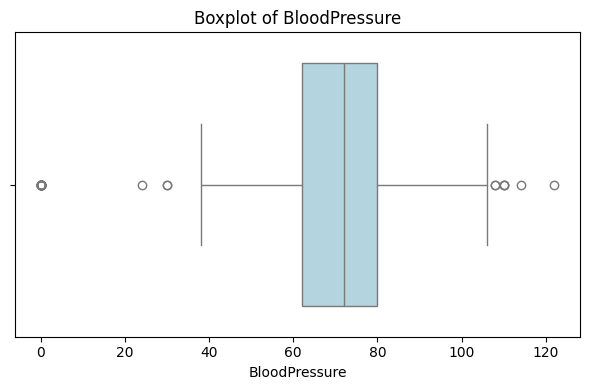

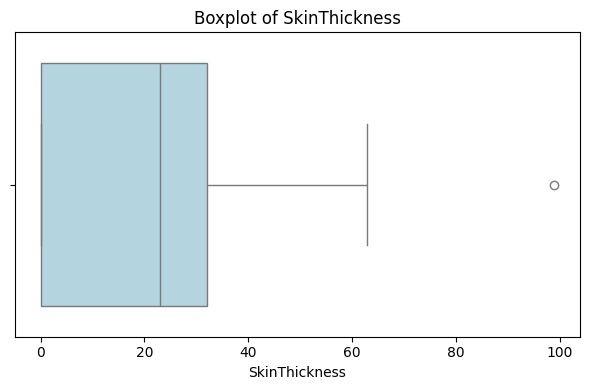

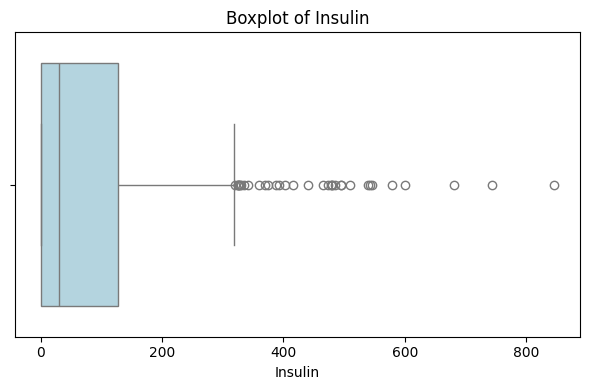

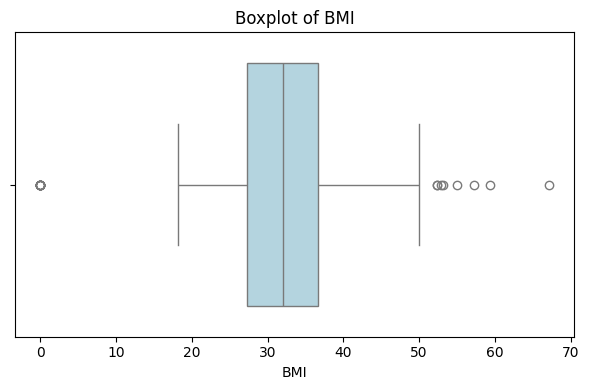

In [44]:
for feature in columns_with_invalid_zeros:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

In [ ]:
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_invalid_zeros] = df[columns_with_invalid_zeros].replace(0, np.nan)
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [18]:
df.fillna(df.median(numeric_only=True), inplace=True)
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


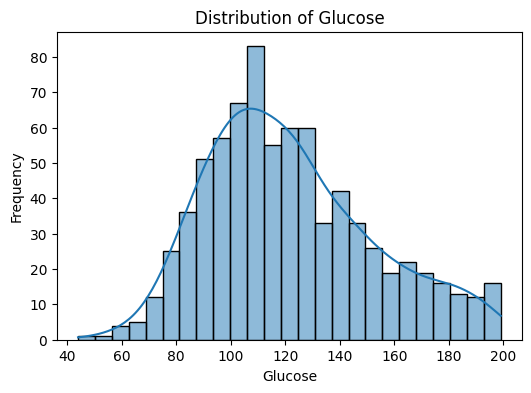

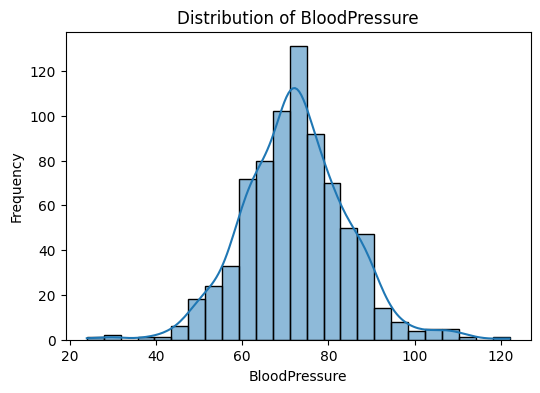

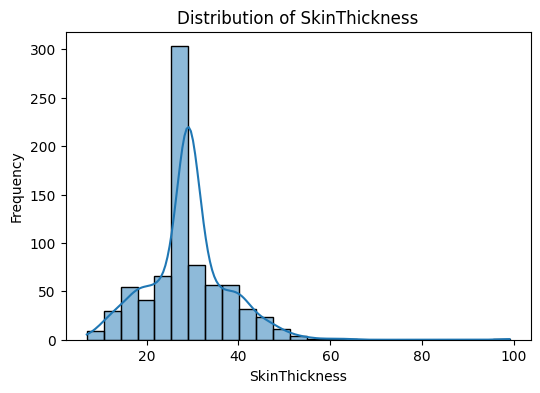

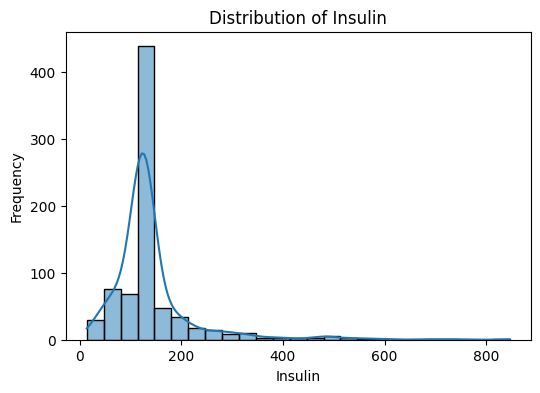

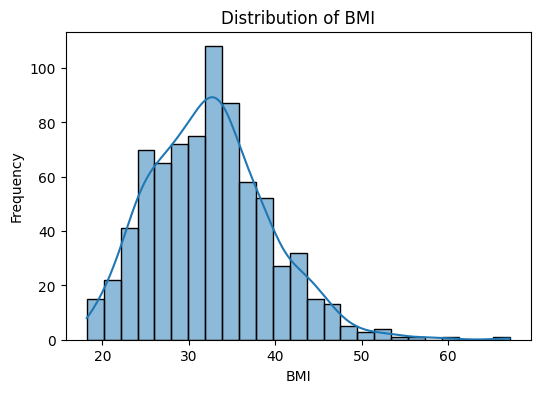

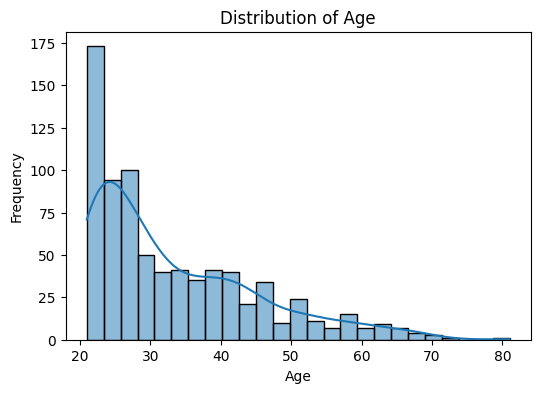

In [21]:
numeric_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

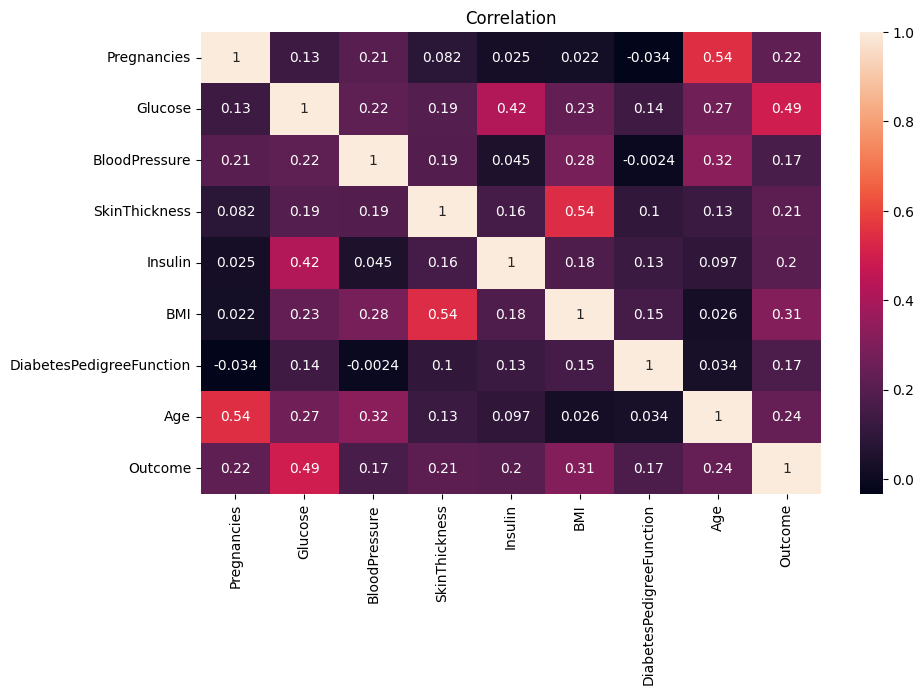

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation")
plt.show()

In [47]:
from scipy.stats import ttest_ind

group0 = df[df['Outcome'] == 0]
group1 = df[df['Outcome'] == 1]

print("T-test Results (p-values):\n")
for feature in numeric_columns:
    t_stat, p_val = ttest_ind(group0[feature], group1[feature])
    significance = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{feature:<15} | p-value: {p_val:.5e} | {significance}")

T-test Results (p-values):

Glucose         | p-value: 3.12872e-48 | Significant
BloodPressure   | p-value: 3.89084e-06 | Significant
SkinThickness   | p-value: 1.79396e-09 | Significant
Insulin         | p-value: 1.21003e-08 | Significant
BMI             | p-value: 8.33690e-19 | Significant
Age             | p-value: 2.20998e-11 | Significant
